In [1]:
from google.colab import files
uploaded = files.upload()


Saving customer_churn.csv to customer_churn.csv


In [2]:
import pandas as pd

df = pd.read_csv("customer_churn.csv")
df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [3]:
df.columns


Index(['CustomerID', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract',
       'PaymentMethod', 'PaperlessBilling', 'SeniorCitizen', 'Churn'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip().str.lower()
df.columns


Index(['customerid', 'tenure', 'monthlycharges', 'totalcharges', 'contract',
       'paymentmethod', 'paperlessbilling', 'seniorcitizen', 'churn'],
      dtype='object')

In [5]:
df.head()


,customerid,tenure,monthlycharges,totalcharges,contract,paymentmethod,paperlessbilling,seniorcitizen,churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        500 non-null    object
 1   tenure            500 non-null    int64 
 2   monthlycharges    500 non-null    int64 
 3   totalcharges      500 non-null    int64 
 4   contract          500 non-null    object
 5   paymentmethod     500 non-null    object
 6   paperlessbilling  500 non-null    object
 7   seniorcitizen     500 non-null    int64 
 8   churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [7]:
df.isnull().sum()


,0
customerid,0
tenure,0
monthlycharges,0
totalcharges,0
contract,0
paymentmethod,0
paperlessbilling,0
seniorcitizen,0
churn,0


In [8]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df.isnull().sum()


,0
customerid,0
tenure,0
monthlycharges,0
totalcharges,0
contract,0
paymentmethod,0
paperlessbilling,0
seniorcitizen,0
churn,0


In [9]:
df = df.dropna()
df.isnull().sum()


,0
customerid,0
tenure,0
monthlycharges,0
totalcharges,0
contract,0
paymentmethod,0
paperlessbilling,0
seniorcitizen,0
churn,0


In [10]:
df['churn'].value_counts()


,count
churn,
0,447
1,53


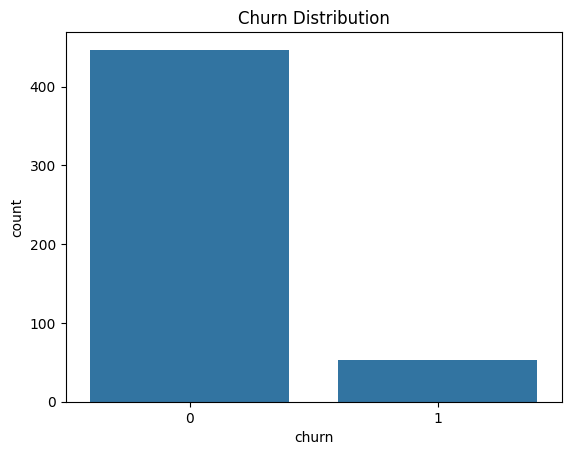

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()


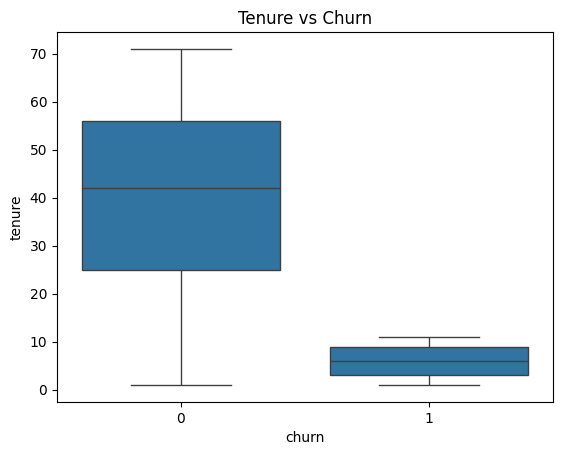

In [12]:
sns.boxplot(x='churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


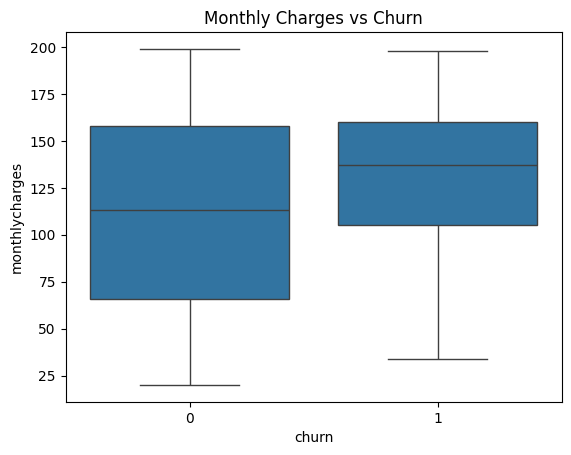

In [13]:
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


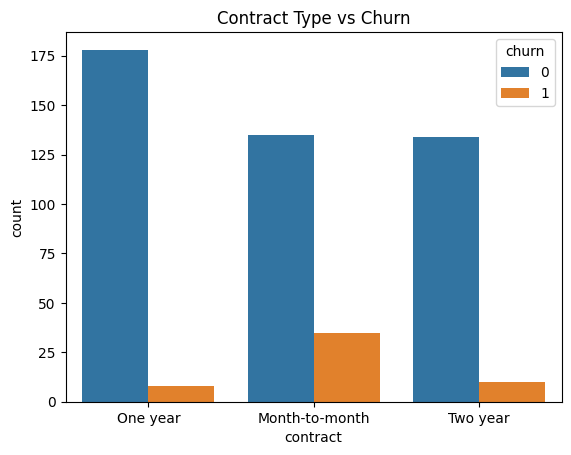

In [14]:
sns.countplot(x='contract', hue='churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()


In [15]:
df.dtypes


,0
customerid,object
tenure,int64
monthlycharges,int64
totalcharges,int64
contract,object
paymentmethod,object
paperlessbilling,object
seniorcitizen,int64
churn,int64


In [16]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols


Index(['customerid', 'contract', 'paymentmethod', 'paperlessbilling'], dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [18]:
X = df.drop(['churn', 'customerid'], axis=1)
y = df['churn']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [20]:
y_train.value_counts(normalize=True)


,proportion
churn,
0,0.895
1,0.105


In [21]:
y_test.value_counts(normalize=True)


,proportion
churn,
0,0.89
1,0.11


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, roc_auc_score


In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [25]:
lr_pred = lr.predict(X_test_scaled)
lr_prob = lr.predict_proba(X_test_scaled)[:, 1]


In [26]:
print("Logistic Regression Recall:", recall_score(y_test, lr_pred))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_prob))


Logistic Regression Recall: 0.5454545454545454
Logistic Regression ROC-AUC: 0.9867211440245147


In [27]:
from sklearn.ensemble import RandomForestClassifier


In [28]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [29]:
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]


In [30]:
print("Random Forest Recall:", recall_score(y_test, rf_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_prob))


Random Forest Recall: 0.6363636363636364
Random Forest ROC-AUC: 1.0


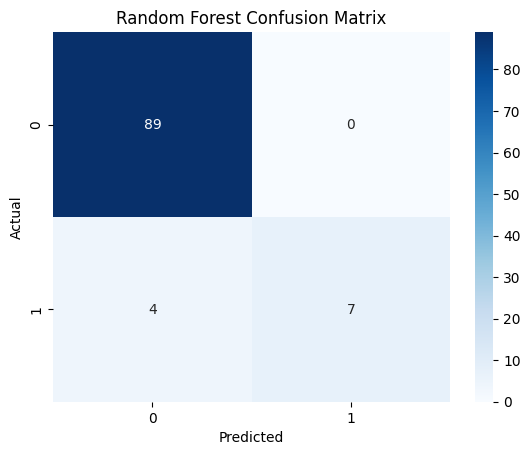

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [32]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
tenure,0.711095
monthlycharges,0.100385
contract,0.074051
totalcharges,0.070885
paymentmethod,0.022721
paperlessbilling,0.011194
seniorcitizen,0.009670


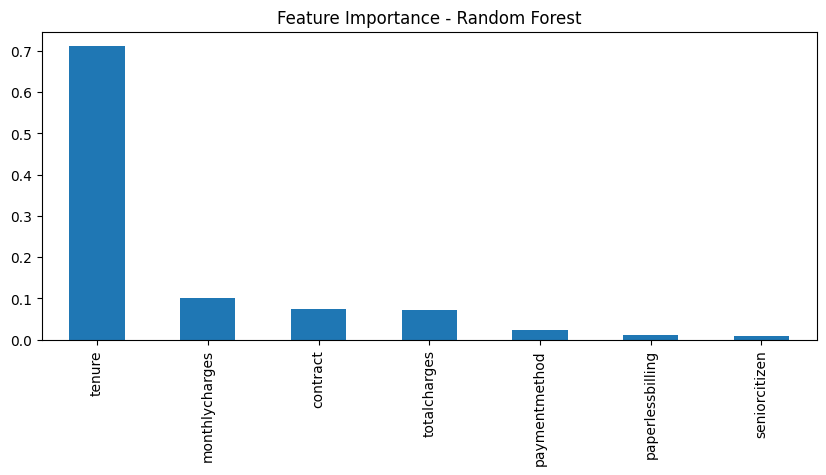

In [33]:
feature_importance.plot(kind="bar", figsize=(10,4))
plt.title("Feature Importance - Random Forest")
plt.show()


In [34]:
import joblib

joblib.dump(rf, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [35]:
def predict_churn(input_dict):
    """
    input_dict: dictionary of customer features
    returns: churn probability
    """
    input_df = pd.DataFrame([input_dict])
    input_df_scaled = scaler.transform(input_df)
    probability = rf.predict_proba(input_df)[:, 1]
    return probability[0]


In [36]:
sample_customer = X.iloc[0].to_dict()
predict_churn(sample_customer)


np.float64(0.04)